# Using Standard Metropolitan Area Data using Decision tree Algorithm to predict crime

Import  libraries needed

In [25]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
data = pd.read_csv('C:\\Users\\kalojeff\\Downloads\\Standard Metropolitan Areas Data - train_data - data.csv')
data.head(1)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55


### Checking for the dataset descripition

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land_area       99 non-null     int64  
 1   percent_city    99 non-null     float64
 2   percent_senior  99 non-null     float64
 3   physicians      99 non-null     int64  
 4   hospital_beds   99 non-null     int64  
 5   graduates       99 non-null     float64
 6   work_force      99 non-null     float64
 7   income          99 non-null     int64  
 8   region          99 non-null     int64  
 9   crime_rate      99 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


### Checking for missingness of data

In [28]:
data.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

###  label features and labels

In [29]:
#X = data.drop('crime_rate', axis  = 1)
y = data['crime_rate']

In [30]:
y[:10]

0    75.55
1    56.03
2    41.32
3    67.38
4    80.19
5    58.48
6    72.25
7    64.88
8    30.51
9    55.30
Name: crime_rate, dtype: float64

In [31]:
X[:10]

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4
5,2815,23.1,6.7,7340,16941,68.3,1541.9,25663,3
6,8360,46.3,8.2,4047,14347,53.6,1321.2,18350,3
7,6794,60.1,6.3,4562,14333,51.7,1272.7,18221,3
8,3049,19.5,12.1,4005,21149,53.4,967.5,15826,1
9,4647,31.5,9.2,3916,12815,65.1,1032.2,14542,2


### Split data into test and train dataset

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state= 42)

In [35]:
X_train[:10]

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
89,1509,37.6,12.0,1087,4900,51.4,319.6,3982,1
5,2815,23.1,6.7,7340,16941,68.3,1541.9,25663,3
45,1420,32.6,9.5,833,2950,54.0,280.8,3553,2
69,2363,53.1,10.6,565,2717,49.3,146.4,1996,3
35,903,37.3,9.6,948,4064,55.6,293.3,4102,2
16,2045,37.2,21.4,1949,8863,50.7,543.2,7989,3
72,2658,39.0,12.2,365,5430,49.9,136.9,1862,1
34,3199,80.6,8.7,983,4749,50.8,292.4,4127,3
7,6794,60.1,6.3,4562,14333,51.7,1272.7,18221,3
55,192,60.5,10.8,617,1789,44.1,212.6,3158,1


# Fitting data into our algorithm 

Since the data contains discrete feature we use regrssion algorithm

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state= 42)

In [33]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

# Evaluating our model

In [42]:
print("Making Predictions for Crime Rate:")
print(X_train.head())
print("Predictions Are")
print(model.predict(X_train.head()))

Making Predictions for Crime Rate:
    land_area  percent_city  percent_senior  physicians  hospital_beds  \
89       1509          37.6            12.0        1087           4900   
5        2815          23.1             6.7        7340          16941   
45       1420          32.6             9.5         833           2950   
69       2363          53.1            10.6         565           2717   
35        903          37.3             9.6         948           4064   

    graduates  work_force  income  region  
89       51.4       319.6    3982       1  
5        68.3      1541.9   25663       3  
45       54.0       280.8    3553       2  
69       49.3       146.4    1996       3  
35       55.6       293.3    4102       2  
Predictions Are
[45.19 58.48 46.26 53.97 52.53]


# Visualing the tree

In [43]:
from sklearn.tree import export_graphviz
import graphviz

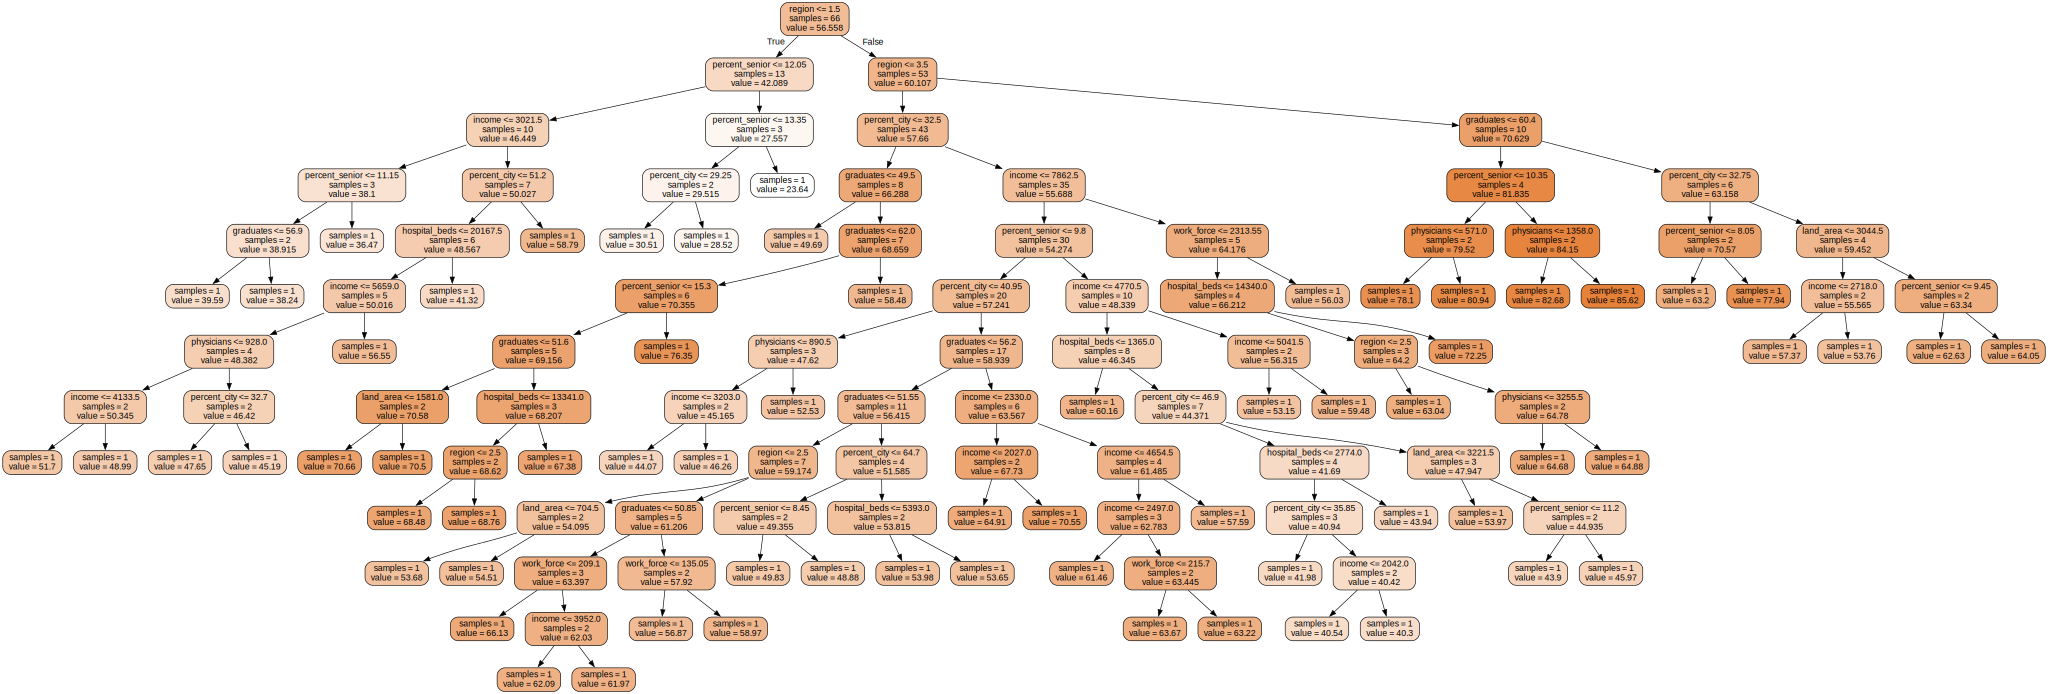

In [46]:
dot_data= export_graphviz(model, out_file=None,impurity=False, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True) 
graph = graphviz.Source(dot_data)
graph